In [26]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings

In [27]:
warnings.simplefilter(action='ignore',category=FutureWarning)
os.getcwd()

'c:\\Users\\kasam\\Desktop\\codsoft'

In [28]:
df=pd.read_csv(r"C:\Users\kasam\Downloads\advertising.csv")

In [29]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [31]:
df.rename(columns={'unnamed:0':'Index'},inplace=True)

In [32]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [33]:
df.shape

(200, 4)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [36]:
df.isnull().values.any()
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

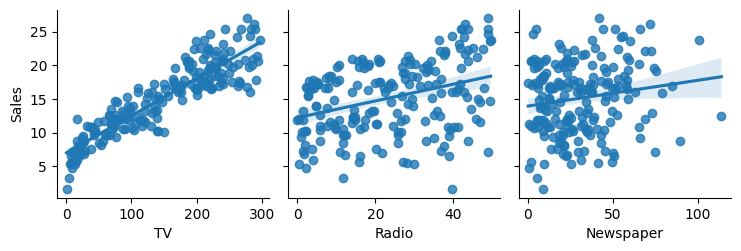

In [37]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

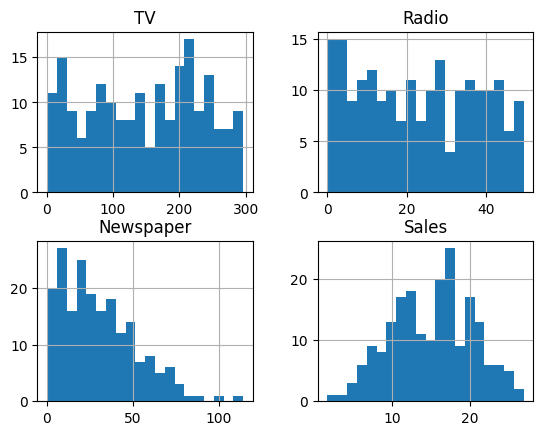

In [38]:
df.hist(bins=20)

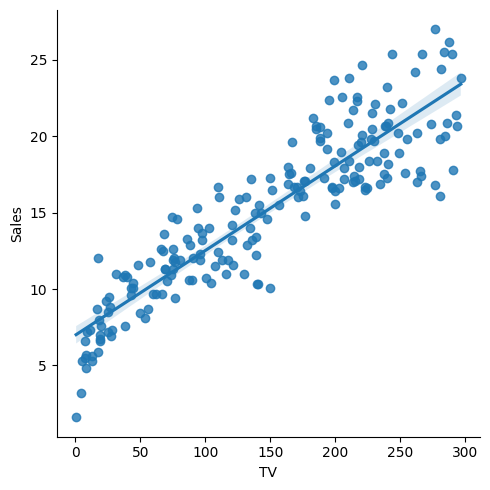

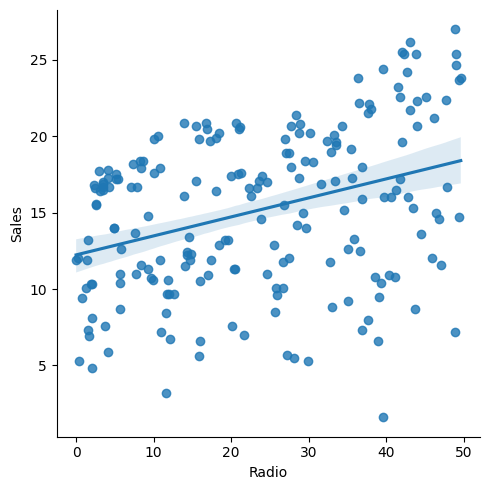

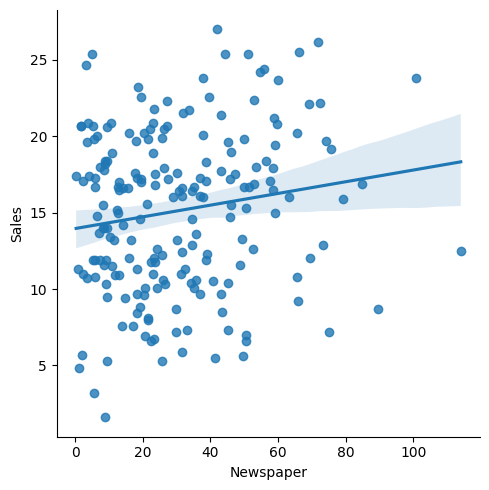

In [39]:
sns.lmplot(x='TV',y='Sales',data=df)
sns.lmplot(x='Radio',y='Sales',data=df)
sns.lmplot(x='Newspaper',y='Sales',data=df)

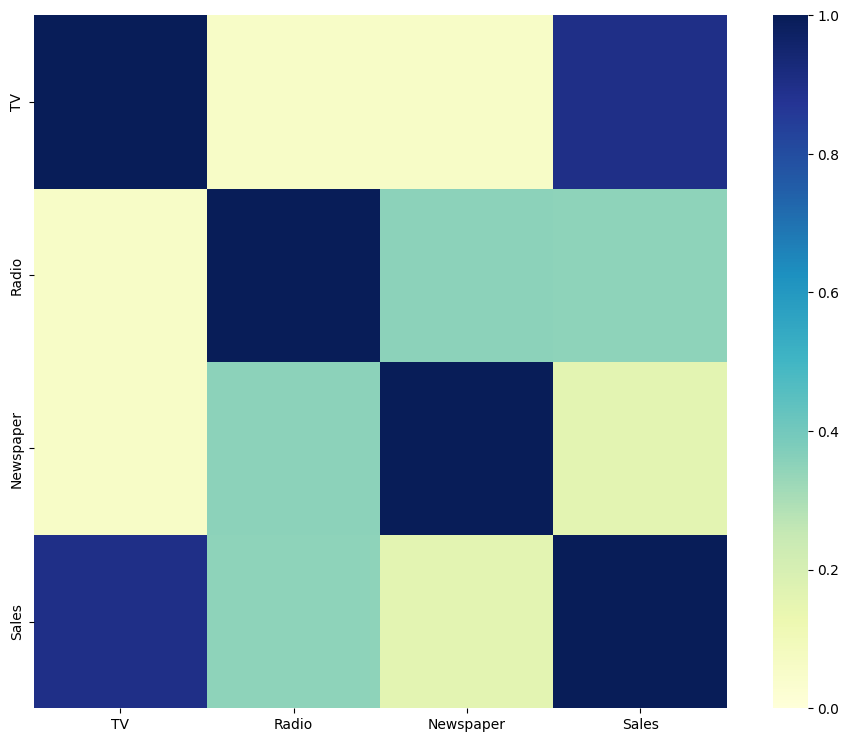

In [40]:
#correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat=df.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmin=0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

In [41]:
#Model Preparation

x=df.drop('Sales',axis=1)
y=df[["Sales"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [42]:
#Linear Regression Model
lin_model=sm.ols(formula="Sales~TV+Radio+Newspaper",data=df).fit()

In [43]:
print(lin_model.params,"\n")

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64 



In [44]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           8.13e-99
Time:                        18:12:53   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

In [45]:
#Evaluate the model
results=[]
names=[]

In [46]:
models=[('LinearRegression',LinearRegression())]

In [47]:
#loop through each model,fit it to the data, and calculate the RMSE
for name,model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    result=np.sqrt(mean_squared_error(y_test,y_pred))
    results.append(result)
    names.append(name)
    msg="%s:%f"%(name,result)
    print(msg)

LinearRegression:1.612152


In [48]:
new_data=pd.DataFrame({'TV': [100],'Radio': [50],'Newspaper': [25]})
predicted_sales=lin_model.predict(new_data)
print("Predicted Sales:",predicted_sales)

Predicted Sales: 0    15.428155
dtype: float64


In [49]:
new_data=pd.DataFrame({'TV':[25],'Radio':[63],'Newspaper':[80]})
predicted_sales=lin_model.predict(new_data)
print("predicted_sales:",predicted_sales)

predicted_sales: 0    12.754199
dtype: float64
